<a href="https://colab.research.google.com/github/MarcosVel/Deep-Learning/blob/master/RNN_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, LSTM, Input
from sklearn.metrics import confusion_matrix

2023-05-23 23:19:59.586719: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-23 23:19:59.619918: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-23 23:20:00.131705: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-05-23 23:20:00.948395: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-23 23:20:00.964599: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-23 23:20:00.964711: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [ ]:
# Load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)


x_train.shape:  (60000, 28, 28)
y_train.shape:  (60000,)


In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
# make the RNN
i = Input(shape=(28, 28)) # same as shape=x_train[0].shape

x = LSTM(15)(i)
x = Dense(10, activation='softmax')(x)

2023-05-23 23:20:01.679702: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-23 23:20:01.679931: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-23 23:20:01.680017: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [ ]:
# build and compile the model
model = Model(i, x)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# train the RNN
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10


2023-05-23 23:20:09.232701: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-23 23:20:09.233628: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-23 23:20:09.234226: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1872/1875 [============================>.] - ETA: 0s - loss: 1.0042 - accuracy: 0.6819

2023-05-23 23:20:14.626825: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-23 23:20:14.627643: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-23 23:20:14.628192: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1875/1875 [==============================] - 6s 2ms/step - loss: 1.0034 - accuracy: 0.6821 - val_loss: 0.5026 - val_accuracy: 0.8456
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3796 - accuracy: 0.8867 - val_loss: 0.2920 - val_accuracy: 0.9157
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2673 - accuracy: 0.9198 - val_loss: 0.2215 - val_accuracy: 0.9349
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2153 - accuracy: 0.9366 - val_loss: 0.2009 - val_accuracy: 0.9380
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1870 - accuracy: 0.9449 - val_loss: 0.1681 - val_accuracy: 0.9493
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1664 - accuracy: 0.9505 - val_loss: 0.1484 - val_accuracy: 0.9565
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1486 - accuracy: 0.9556 - val_loss: 0.1490 - val_accuracy: 0.9547
Epo

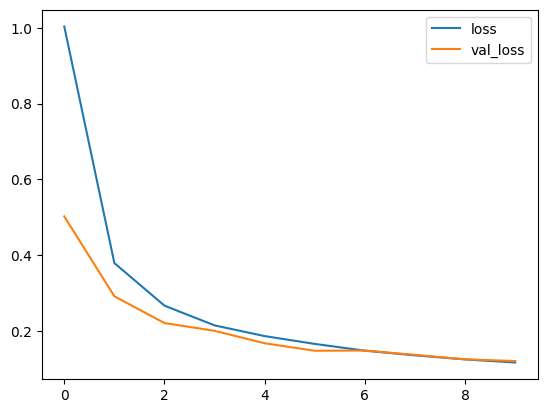

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

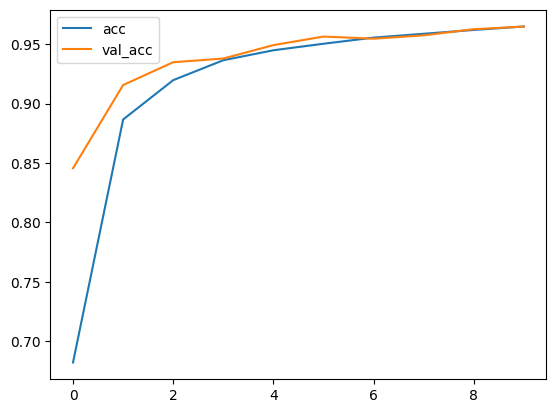

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [ ]:
# evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.1212 - accuracy: 0.9649
[0.12124896049499512, 0.964900016784668]


In [ ]:
# Plot confusion matrix
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
print(cm)

115/313 [==========>...................] - ETA: 0s

2023-05-23 23:23:07.622323: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-23 23:23:07.623117: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-23 23:23:07.623742: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

313/313 [==============================] - 0s 877us/step
[[ 962    0    4    0    1    3    2    1    7    0]
 [   2 1113    4    3    1    1    2    0    9    0]
 [   3    1 1001    4    1    2    2   10    8    0]
 [   0    0    8  989    0    4    0    4    5    0]
 [   1    0    1    0  929    1    8    4    3   35]
 [   0    1    2   24    0  840    4    1   13    7]
 [   8    2    4    0    9    5  921    0    9    0]
 [   0    1   10   10    1    0    0  993    1   12]
 [   9    1    8    6    4    6    4    2  932    2]
 [   2    4    0    9   11    2    0    8    4  969]]


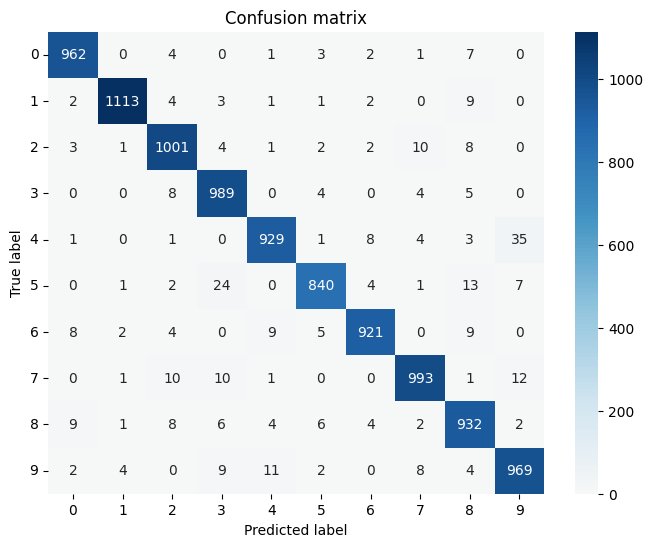

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu", center=0)
plt.yticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

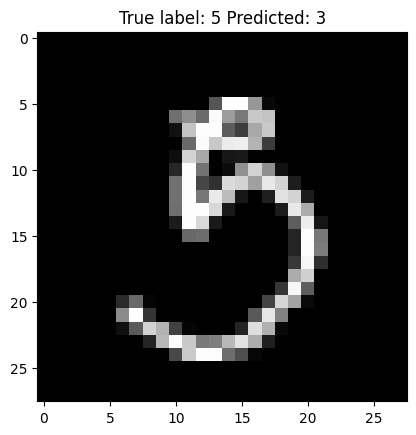

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]))
plt.show()